In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
attendance_df = pd.read_csv("../data/nba_2017_attendance.csv");attendance_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680
1,Dallas Mavericks,41,103,0.811366,0.019789
2,Sacramento Kings,41,101,0.721928,0.017608
3,Miami Heat,41,100,0.805400,0.019643
4,Toronto Raptors,41,100,0.813050,0.019830


In [3]:
endorsement_df = pd.read_csv("../data/nba_2017_endorsements.csv");endorsement_df.head()

,NAME,TEAM,SALARY_MILLIONS,ENDORSEMENT_MILLIONS
0,LeBron James,Cleveland Cavaliers,31,55
1,Kevin Durant,Golden State Warriors,27,36
2,Stephen Curry,Golden State Warriors,12,35
3,James Harden,Houston Rockets,27,20
4,Russell Westbrook,Oklahoma City Thunder,27,15


In [4]:
valuations_df = pd.read_csv("../data/nba_2017_team_valuations.csv");valuations_df.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [5]:
salary_df = pd.read_csv("../data/nba_2017_salary.csv");salary_df.head()

,NAME,POSITION,TEAM,SALARY
0,LeBron James,SF,Cleveland Cavaliers,30963450.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0
2,Al Horford,C,Boston Celtics,26540100.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0


In [6]:
pie_df = pd.read_csv("../data/nba_2017_pie.csv");pie_df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,OFFRTG,DEFRTG,NETRTG,...,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,USG%,PACE,PIE
0,Russell Westbrook,OKC,28,81,46,35,34.6,107.9,104.6,3.3,...,23.4,5.3,27.9,16.7,12.2,47.6,55.4,40.8,102.31,23.0
1,Boban Marjanovic,DET,28,35,16,19,8.4,104.3,102.4,1.9,...,5.1,16.6,31.3,23.9,5.7,54.5,60.6,24.8,97.20,19.6
2,Demetrius Jackson,BOS,22,5,1,4,3.4,124.2,117.8,6.3,...,31.1,9.1,11.8,10.3,0.0,87.5,75.3,17.2,87.46,19.4
3,Anthony Davis,NOP,24,75,31,44,36.1,104.2,102.5,1.7,...,7.3,6.7,26.9,17.0,8.4,51.8,58.0,32.6,100.19,19.2
4,James Harden,HOU,27,81,54,27,36.4,113.6,107.3,6.3,...,27.6,3.5,21.2,12.3,14.1,52.5,61.3,34.1,102.98,19.0


In [7]:
plus_minus_df = pd.read_csv("../data/nba_2017_real_plus_minus.csv");plus_minus_df.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS
0,"LeBron James, SF",CLE,74,37.8,6.49,1.93,8.42,20.43
1,"Stephen Curry, PG",GS,79,33.4,7.27,0.14,7.41,18.80
2,"Jimmy Butler, SG",CHI,76,37.0,4.82,1.80,6.62,17.35
3,"Russell Westbrook, PG",OKC,81,34.6,6.74,-0.47,6.27,17.34
4,"Draymond Green, PF",GS,76,32.5,1.55,5.59,7.14,16.84


In [8]:
br_stats_df = pd.read_csv("../data/nba_2017_br.csv");br_stats_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
1,2,James Harden,PG,27,HOU,81,81,36.4,8.3,18.9,...,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1
2,3,Isaiah Thomas,PG,27,BOS,76,76,33.8,9.0,19.4,...,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9
3,4,Anthony Davis,C,23,NOP,75,75,36.1,10.3,20.3,...,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0
4,5,DeMar DeRozan,SG,27,TOR,74,74,35.4,9.7,20.9,...,0.842,0.9,4.3,5.2,3.9,1.1,0.2,2.4,1.8,27.3


In [9]:
elo_df = pd.read_csv("../data/nba_2017_elo.csv");elo_df.head()

,ELO,TEAM,CONF
0,1770,Golden State Warriors,West
1,1661,San Antonio Spurs,West
2,1636,Los Angeles Clippers,West
3,1617,Utah Jazz,West
4,1602,Houston Rockets,West


In [10]:
attendance_valuation_df = attendance_df.merge(valuations_df, how="inner", on="TEAM")

In [11]:
attendance_valuation_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0
3,Miami Heat,41,100,0.805400,0.019643,1350.0
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0


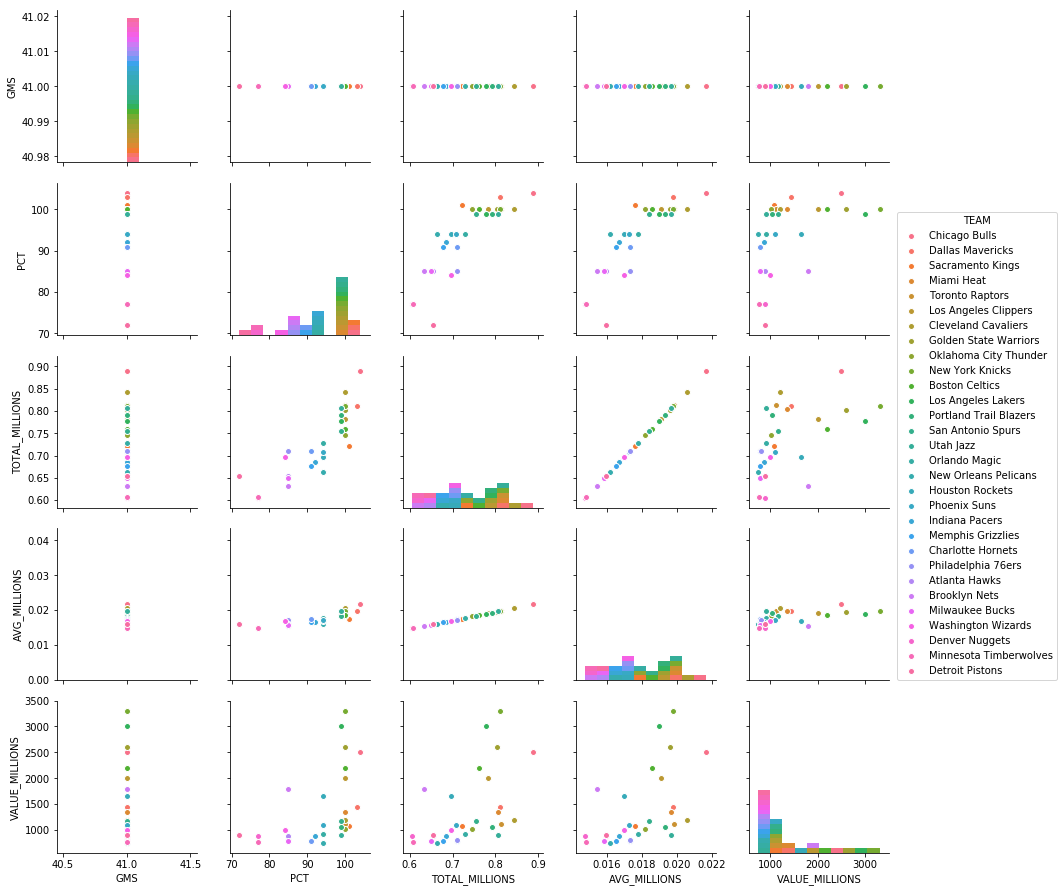

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"));sns.pairplot(attendance_valuation_df, hue="TEAM")

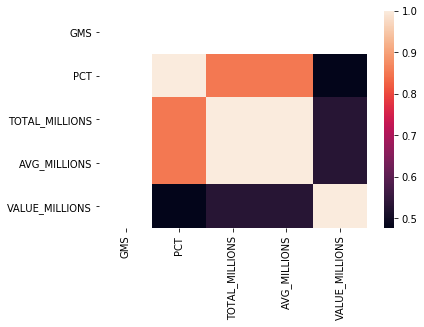

In [13]:
corr = attendance_valuation_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [14]:
attendance_valuation_df.to_csv("../data/nba_2017_att_val.csv");corr

,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS
GMS,NaN,NaN,NaN,NaN,NaN
PCT,NaN,1.000000,0.850839,0.85085,0.476644
TOTAL_MILLIONS,NaN,0.850839,1.000000,1.00000,0.530697
AVG_MILLIONS,NaN,0.850850,1.000000,1.00000,0.530730
VALUE_MILLIONS,NaN,0.476644,0.530697,0.53073,1.000000


In [15]:
valuations = attendance_valuation_df.pivot("TEAM", "TOTAL_MILLIONS", "VALUE_MILLIONS")

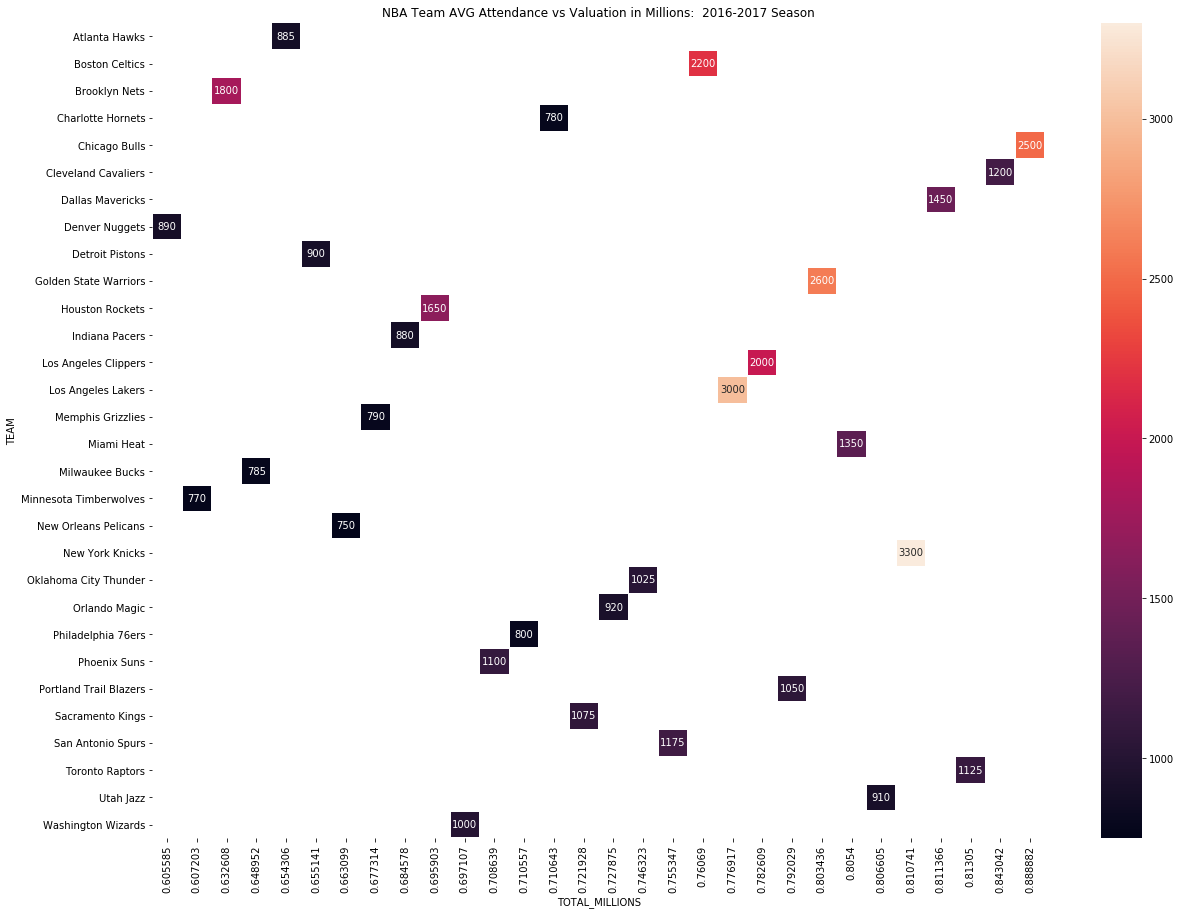

In [16]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season")
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')

In [17]:
results = smf.ols('VALUE_MILLIONS ~TOTAL_MILLIONS', data=attendance_valuation_df).fit()

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     10.98
Date:                Fri, 09 Feb 2018   Prob (F-statistic):            0.00255
Time:                        15:28:41   Log-Likelihood:                -234.04
No. Observations:                  30   AIC:                             472.1
Df Residuals:                      28   BIC:                             474.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2408.0191   1141.332     -2.

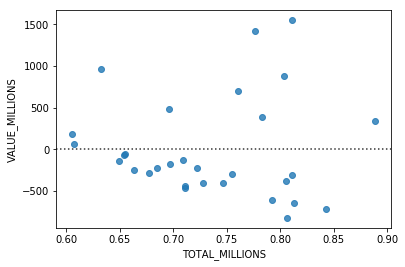

In [19]:
sns.residplot(y="VALUE_MILLIONS", x="TOTAL_MILLIONS", data=attendance_valuation_df)

In [20]:
attendance_valuation_predictions_df = attendance_valuation_df.copy()

In [21]:
attendance_valuation_predictions_df["predicted"] = results.predict()

In [22]:
import statsmodels
rmse = statsmodels.tools.eval_measures.rmse(attendance_valuation_predictions_df["predicted"], attendance_valuation_predictions_df["VALUE_MILLIONS"])
rmse

591.33219017442696

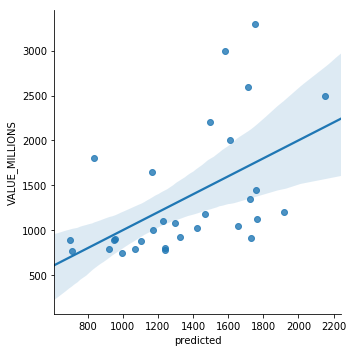

In [23]:
sns.lmplot(x="predicted", y="VALUE_MILLIONS", data=attendance_valuation_predictions_df)

In [24]:
attendance_valuation_elo_df = attendance_valuation_df.merge(elo_df, how="inner", on="TEAM")

In [25]:
attendance_valuation_elo_df.head()

,TEAM,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO,CONF
0,Chicago Bulls,41,104,0.888882,0.021680,2500.0,1519,East
1,Dallas Mavericks,41,103,0.811366,0.019789,1450.0,1420,West
2,Sacramento Kings,41,101,0.721928,0.017608,1075.0,1393,West
3,Miami Heat,41,100,0.805400,0.019643,1350.0,1569,East
4,Toronto Raptors,41,100,0.813050,0.019830,1125.0,1600,East


In [26]:
attendance_valuation_elo_df.to_csv("../data/  ")

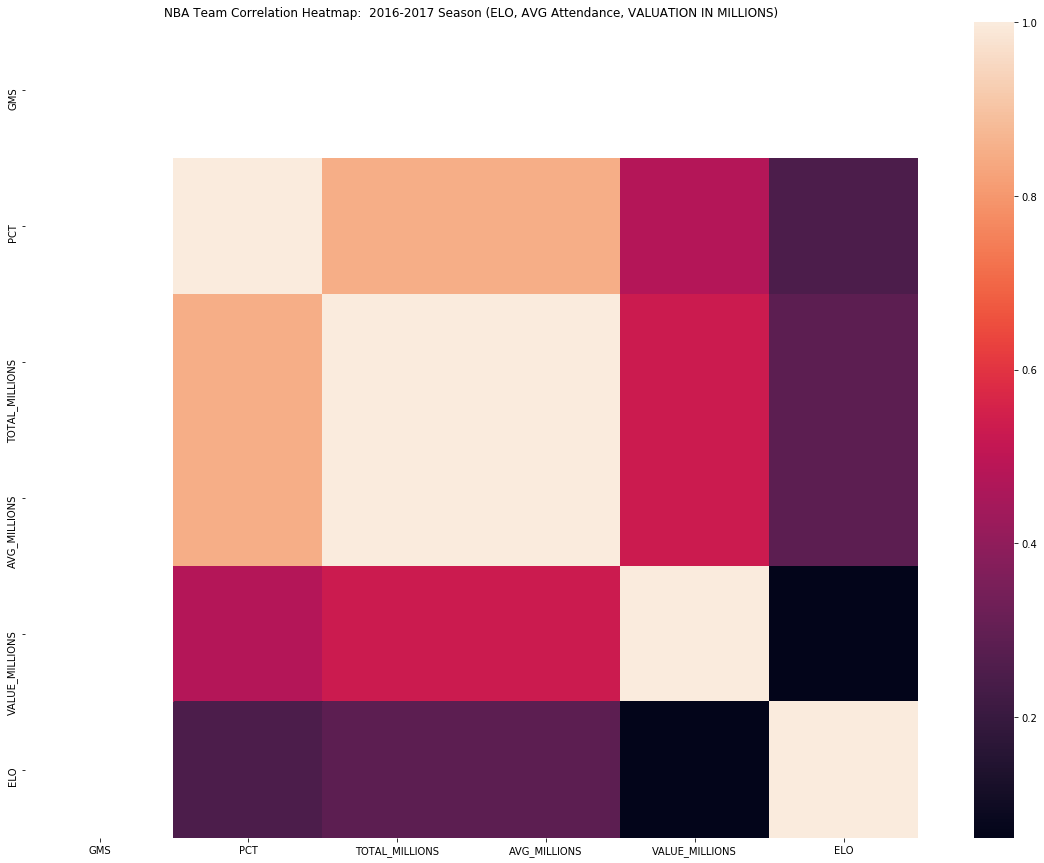

In [27]:
corr_elo = attendance_valuation_elo_df.corr()
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team Correlation Heatmap:  2016-2017 Season (ELO, AVG Attendance, VALUATION IN MILLIONS)")
sns.heatmap(corr_elo, 
            xticklabels=corr_elo.columns.values,
            yticklabels=corr_elo.columns.values)

In [28]:
corr_elo

,GMS,PCT,TOTAL_MILLIONS,AVG_MILLIONS,VALUE_MILLIONS,ELO
GMS,NaN,NaN,NaN,NaN,NaN,NaN
PCT,NaN,1.000000,0.850839,0.85085,0.476644,0.251144
TOTAL_MILLIONS,NaN,0.850839,1.000000,1.00000,0.530697,0.285907
AVG_MILLIONS,NaN,0.850850,1.000000,1.00000,0.530730,0.285930
VALUE_MILLIONS,NaN,0.476644,0.530697,0.53073,1.000000,0.060575
ELO,NaN,0.251144,0.285907,0.28593,0.060575,1.000000


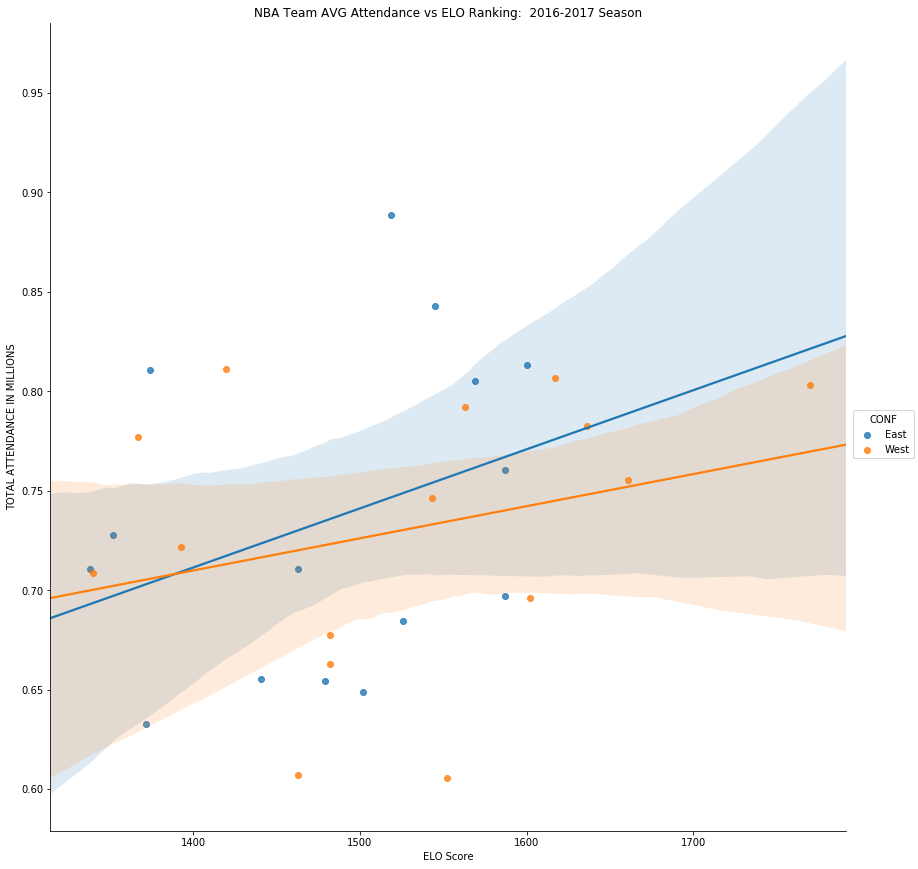

In [29]:
ax = sns.lmplot(x="ELO", y="TOTAL_MILLIONS", data=attendance_valuation_elo_df, hue="CONF", size=12)
ax.set(xlabel='ELO Score', ylabel='TOTAL ATTENDANCE IN MILLIONS', title="NBA Team AVG Attendance vs ELO Ranking:  2016-2017 Season")

In [30]:
attendance_valuation_elo_df.groupby("CONF")["ELO"].median()


CONF
East    1502
West    1543
Name: ELO, dtype: int64

In [31]:
attendance_valuation_elo_df.groupby("CONF")["TOTAL_MILLIONS"].median()

CONF
East    0.710643
West    0.746323
Name: TOTAL_MILLIONS, dtype: float64

In [32]:
results = smf.ols('TOTAL_MILLIONS ~ELO', data=attendance_valuation_elo_df).fit()


In [33]:
print(results.summary())
      


                            OLS Regression Results                            
Dep. Variable:         TOTAL_MILLIONS   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.493
Date:                Fri, 09 Feb 2018   Prob (F-statistic):              0.126
Time:                        15:28:43   Log-Likelihood:                 37.584
No. Observations:                  30   AIC:                            -71.17
Df Residuals:                      28   BIC:                            -68.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4378      0.188      2.334      0.0

In [38]:
val_housing_win_df = pd.read_csv("../data/nba_2017_att_val_elo_win_housing.csv");val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
0,Chicago Bulls,41,104,1,0.888882,2500,1519,East,Cook,269900.0,5.20
1,Dallas Mavericks,41,103,0,0.811366,1450,1420,West,Dallas,314990.0,2.57
2,Sacramento Kings,41,101,0,0.721928,1075,1393,West,Sacremento,343950.0,1.51
3,Miami Heat,41,100,1,0.805400,1350,1569,East,Miami-Dade,389000.0,2.71
4,Toronto Raptors,41,100,1,0.813050,1125,1600,East,York-County,390000.0,1.10


In [35]:
val_housing_win_df.columns

Index(['TEAM', 'GMS', 'PCT_ATTENDANCE', 'WINNING_SEASON',
       'TOTAL_ATTENDANCE_MILLIONS', 'VALUE_MILLIONS', 'ELO', 'CONF', 'COUNTY',
       'MEDIAN_HOME_PRICE_COUNTY_MILLIONS', 'COUNTY_POPULATION_MILLIONS'],
      dtype='object')

In [40]:
results = smf.ols('VALUE_MILLIONS ~COUNTY_POPULATION_MILLIONS+TOTAL_ATTENDANCE_MILLIONS+MEDIAN_HOME_PRICE_COUNTY_MILLIONS', data=val_housing_win_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         VALUE_MILLIONS   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     37.12
Date:                Fri, 09 Feb 2018   Prob (F-statistic):           1.52e-09
Time:                        15:30:59   Log-Likelihood:                -214.03
No. Observations:                  30   AIC:                             436.1
Df Residuals:                      26   BIC:                             441.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/noahgift/.socialpowernba/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


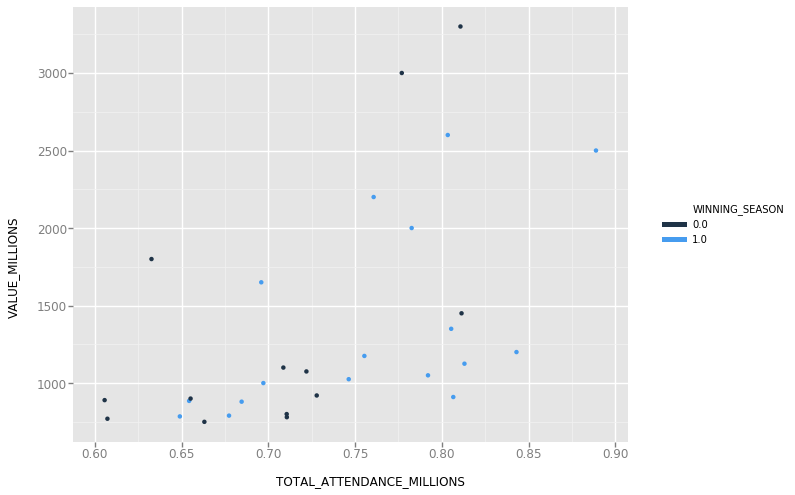

<ggplot: (-9223372036556891297)>

In [41]:
from ggplot import *
ggplot(val_housing_win_df, aes(x="TOTAL_ATTENDANCE_MILLIONS", y="VALUE_MILLIONS", color="WINNING_SEASON")) + geom_point()

In [44]:
numerical_df = val_housing_win_df.loc[:,["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(numerical_df))
print(scaler.transform(numerical_df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[ 1.          0.41898148  0.68627451  0.08776879]
 [ 0.72637903  0.18981481  0.2745098   0.11603661]
 [ 0.41067502  0.12731481  0.12745098  0.13419221]
 [ 0.70531986  0.53472222  0.23529412  0.16243496]
 [ 0.73232332  0.60648148  0.14705882  0.16306188]
 [ 0.62487072  0.68981481  0.49019608  0.31038806]
 [ 0.83819102  0.47916667  0.17647059  0.00476459]
 [ 0.6983872   1.          0.7254902   0.39188139]
 [ 0.49678606  0.47453704  0.10784314  0.04993825]
 [ 0.72417286  0.08333333  1.          1.        ]
 [ 0.54749962  0.57638889  0.56862745  0.23139615]
 [ 0.60477873  0.06712963  0.88235294  0.31038806]
 [ 0.65812204  0.52083333  0.11764706  0.184816  ]
 [ 0.52863955  0.74768519  0.16666667  0.08156228]
 [ 0.70957335  0.64583333  0.0627451   0.13983449]
 [ 0.43166712  0.03240741  0.06666667  0.10657639]
 [ 0.20301662  0.33333333  0.          0.10350448]
 [ 0.31881029  0.61111111  0.35294118  0.09062441]
 [ 0.36376665  0.00462963  0.1372549

In [46]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
kmeans = k_means.fit(scaler.transform(numerical_df))
val_housing_win_df['cluster'] = kmeans.labels_
val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS,cluster
0,Chicago Bulls,41,104,1,0.888882,2500,1519,East,Cook,269900.0,5.20,1
1,Dallas Mavericks,41,103,0,0.811366,1450,1420,West,Dallas,314990.0,2.57,1
2,Sacramento Kings,41,101,0,0.721928,1075,1393,West,Sacremento,343950.0,1.51,0
3,Miami Heat,41,100,1,0.805400,1350,1569,East,Miami-Dade,389000.0,2.71,1
4,Toronto Raptors,41,100,1,0.813050,1125,1600,East,York-County,390000.0,1.10,1


In [47]:
val_housing_win_df.to_csv("../data/nba_2017_att_val_elo_win_housing_cluster.csv")

### KMeans Cluster Plot of Team Valuation

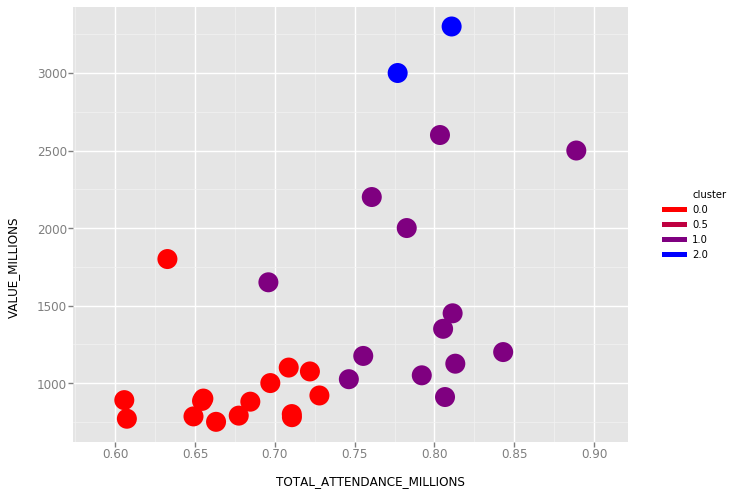

<ggplot: (329003626)>

In [124]:
from ggplot import *
ggplot(val_housing_win_df, aes(x="TOTAL_ATTENDANCE_MILLIONS", y="VALUE_MILLIONS", color="cluster")) +\
geom_point(size=400) + scale_color_gradient(low = 'red', high = 'blue')

### Elbow method shows that 3 clusters is decent choice

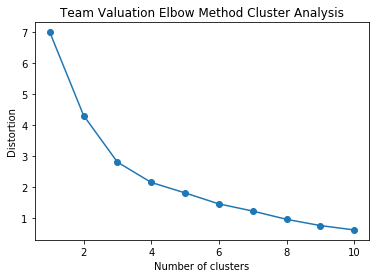

In [125]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(numerical_df))
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Team Valuation Elbow Method Cluster Analysis")
plt.show()

### Silhouette Plot
### (Code loosely based on Python ML 2nd edition example)


In [126]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
y_km = km.fit_predict(scaler.transform(numerical_df))

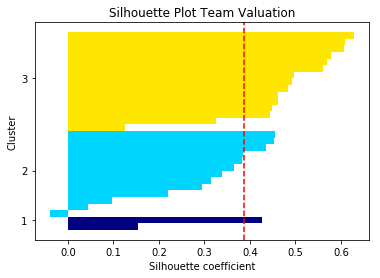

In [127]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(numerical_df),
                                     y_km,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot Team Valuation')
plt.show()

### Agglomerative clustering (Hierachial) vs KMeans clustering

### (Code loosely based on Python ML 2nd edition example)

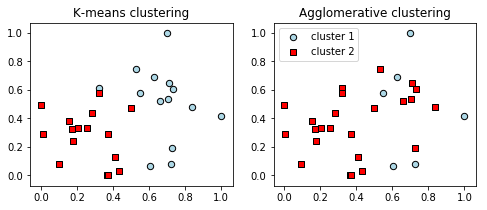

In [130]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2,
            random_state=0)
X = scaler.transform(numerical_df)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
from sklearn.cluster import AgglomerativeClustering

X = scaler.transform(numerical_df)
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
             X[y_ac==0,1],
             c='lightblue',
             edgecolor='black',
             marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

### 3D Plot

![Valuation 3D Plot](https://user-images.githubusercontent.com/58792/36056809-7f87a266-0dbc-11e8-8877-9bb87905adbd.png)